In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Dense, Flatten, Conv2D, MaxPooling2D, RandomFlip, RandomRotation, RandomZoom, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from PIL import Image, ImageOps

In [2]:
# this cell can be commented out/ignored since np array are already saved

def load_images_from_folder(folder, label, desired_size=128):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            # Calculate padding
            pixels = np.array(img)
            min_pixel, max_pixel = pixels.min(), pixels.max()
            padding = int((max_pixel - min_pixel) / 10)  # Example padding calculation

            # Add padding to the image
            img = ImageOps.expand(img, border=padding, fill='black')
            
            # convert to rgb
            img = img.convert('RGB')

            # Resize to the desired size
            img = img.resize((desired_size, desired_size))

            images.append(np.array(img)) 
            labels.append(label)
    return images, labels

# Load images from two directories
class0_images, class0_labels = load_images_from_folder('Data/public/non_globally_sclerotic_glomeruli', 0 )
class1_images, class1_labels = load_images_from_folder('Data/public/globally_sclerotic_glomeruli', 1)

# save labels and images in numpy arrays
np.save('Data_created/class0_images.npy', class0_images)
np.save('Data_created/class0_labels.npy', class0_labels)
np.save('Data_created/class1_images.npy', class1_images)
np.save('Data_created/class1_labels.npy', class1_labels)






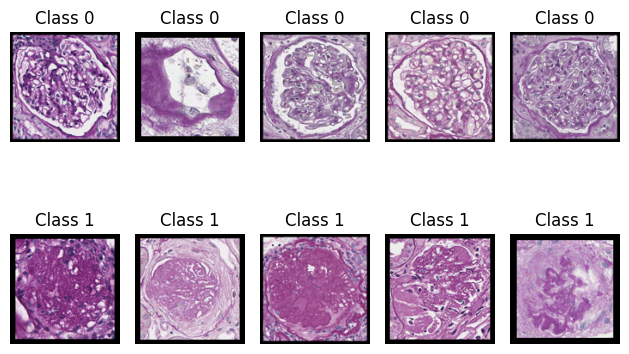

In [3]:
#load images from numpy arrays
class0_images = np.load('Data_created/class0_images.npy')
class0_labels = np.load('Data_created/class0_labels.npy')
class1_images = np.load('Data_created/class1_images.npy')
class1_labels = np.load('Data_created/class1_labels.npy')


import matplotlib.pyplot as plt

# Display images from class0_images
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(class0_images[i])
    plt.axis('off')
    plt.title('Class 0')
    
# Display images from class1_images
for i in range(5):
    plt.subplot(2, 5, i+6)
    plt.imshow(class1_images[i+5])
    plt.axis('off')
    plt.title('Class 1')

plt.tight_layout()
plt.show()

In [4]:
# concatenate the images and labels
images = np.concatenate([class0_images, class1_images])
labels = np.concatenate([class0_labels, class1_labels])

In [5]:
# Create a data generator for data augmentation
# augmentation class 1

class1_augemtation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1)
])

num_imgages_to_generate = len(class0_images) - len(class1_images)

class1_augmented_images = []
class1_augmented_labels = []
for i in range(num_imgages_to_generate):
    img = class1_images[i % len(class1_images)]
    img = class1_augemtation(np.expand_dims(img, 0))
    class1_augmented_images.append(img[0])
    class1_augmented_labels.append(1)

In [6]:
for i in range(5):
    plt.subplot(2, 5, i+6,)
    plt.imshow(class1_augmented_images[i]/255)
    plt.axis('off')
    plt.title('Class 1')

plt.tight_layout()
plt.show()

In [7]:
# # concat the augmented images and labels to the original images and labels
images = np.concatenate([images, class1_augmented_images])
labels = np.concatenate([labels, class1_augmented_labels])

#save the augmented images and labels
np.save('Data_created/images.npy', images)
np.save('Data_created/labels.npy', labels)

In [8]:
raw_images = np.concatenate([class0_images, class1_images])
raw_labels = np.concatenate([class0_labels, class1_labels])

# save np arrays
np.save('Data_created/raw_images.npy', raw_images)
np.save('Data_created/raw_labels.npy', raw_labels)

In [9]:

# # Load the images and labels
images = np.load('Data_created/images.npy')
labels = np.load('Data_created/labels.npy')

raw_images = np.load('Data_created/raw_images.npy')
raw_labels = np.load('Data_created/raw_labels.npy')



In [10]:
#no of instances in each class
num_class0 = np.sum(labels == 0)
num_class1 = np.sum(labels == 1)
print(f'Number of instances in class 0: {num_class0}')
print(f'Number of instances in class 1: {num_class1}')

Number of instances in class 0: 4704
Number of instances in class 1: 4704


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

In [12]:
simple_cnn_model = Sequential()
simple_cnn_model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(128, 128, 3)))
simple_cnn_model.add(BatchNormalization())
simple_cnn_model.add(MaxPooling2D())
simple_cnn_model.add(Conv2D(32, (3,3), 1, activation='relu'))
simple_cnn_model.add(MaxPooling2D())
simple_cnn_model.add(Conv2D(16, (3,3), 1, activation='relu'))
simple_cnn_model.add(MaxPooling2D())
simple_cnn_model.add(Flatten())
simple_cnn_model.add(Dense(256, activation='relu'))
simple_cnn_model.add(Dense(1, activation='sigmoid'))

/Users/harlow/.local/share/virtualenvs/CMI-6QzysqVg/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 813,105 (3.10 MB)

 Trainable params: 813,073 (3.10 MB)

 Non-trainable params: 32 (128.00 B)

Epoch 1/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 27s 108ms/step - accuracy: 0.8782 - loss: 0.2696 - val_accuracy: 0.9394 - val_loss: 0.1518
Epoch 2/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 25s 105ms/step - accuracy: 0.9605 - loss: 0.0952 - val_accuracy: 0.9724 - val_loss: 0.0777
Epoch 3/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 25s 106ms/step - accuracy: 0.9772 - loss: 0.0626 - val_accuracy: 0.9570 - val_loss: 0.1186
Epoch 4/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 26s 111ms/step - accuracy: 0.9811 - loss: 0.0515 - val_accuracy: 0.9697 - val_loss: 0.0742
Epoch 5/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 26s 112ms/step - accuracy: 0.9867 - loss: 0.0409 - val_accuracy: 0.9756 - val_loss: 0.0638
Epoch 6/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 26s 112ms/step - accuracy: 0.9909 - loss: 0.0340 - val_accuracy: 0.9782 - val_loss: 0.0608
Epoch 7/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 27s 115ms/step - accuracy: 0.9943 - loss: 0.0214 - val_accuracy: 0.9798 - val_loss: 0.0582
Epoch 8/20
236/236 ━━━━━━━━━━━━━━━━━━━━ 28s 120ms/step - accuracy: 0.9978 - loss: 0

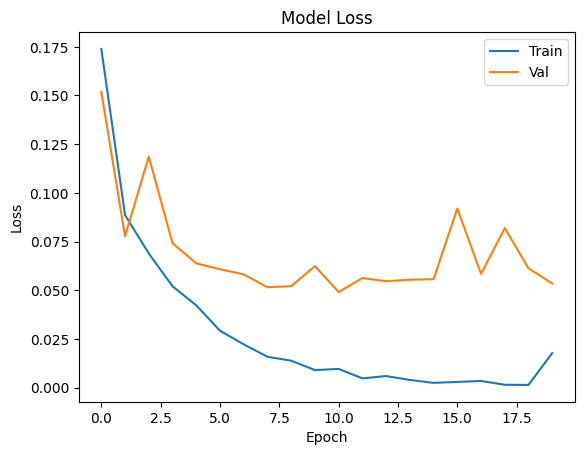

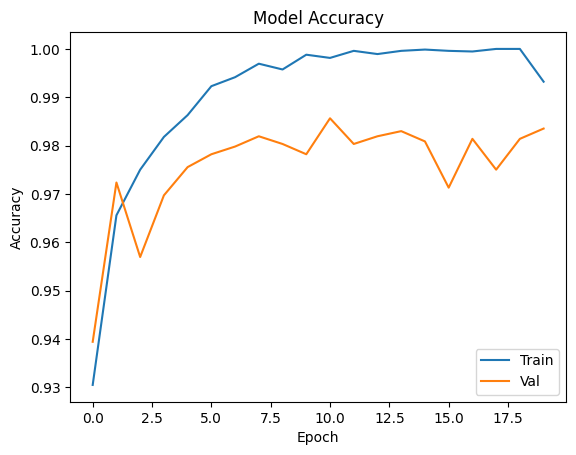

59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9805 - loss: 0.0636
[0.053462423384189606, 0.9835281372070312] simple cnn model


In [13]:
optimal = Adam(learning_rate=0.0001)

simple_cnn_model.compile(optimizer=optimal, loss='binary_crossentropy', metrics=['accuracy'])

simple_cnn_model.summary()

# fit the model
history = simple_cnn_model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

# Plot the training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Evaluate the model
print(simple_cnn_model.evaluate(x_val, y_val), 'simple cnn model')

simple_cnn_model.compiled_metrics = ['accuracy']

59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step


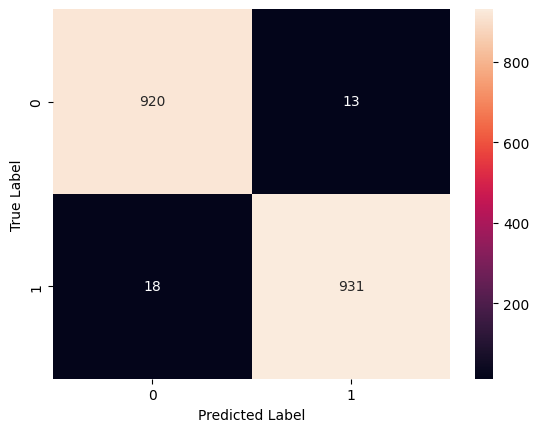

In [14]:
# confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = simple_cnn_model.predict(x_val)
y_pred = np.round(y_pred)
cm = confusion_matrix(y_val, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')

plt.ylabel('True Label')
plt.show()

    


In [15]:
simple_cnn_model.save('simple_cnn_model.h5')

# Visualisation of convolutional layers

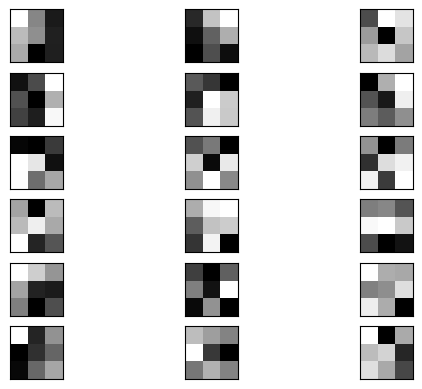

In [16]:
filet, biases = simple_cnn_model.layers[0].get_weights()

# Normalize the filters
f_min, f_max = filet.min(), filet.max()
filters = (filet - f_min) / (f_max - f_min)

n_filters, ix = 6, 1
for i in range(n_filters):
    f = filters[:, :, :, i]
    for j in range(3):
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


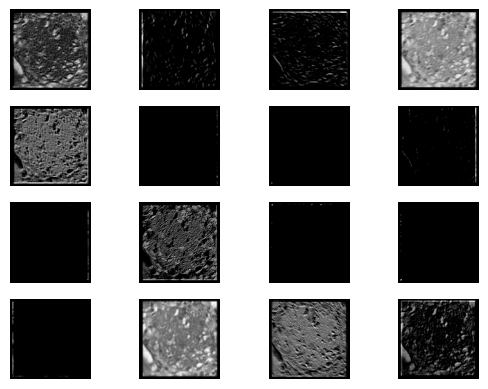

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


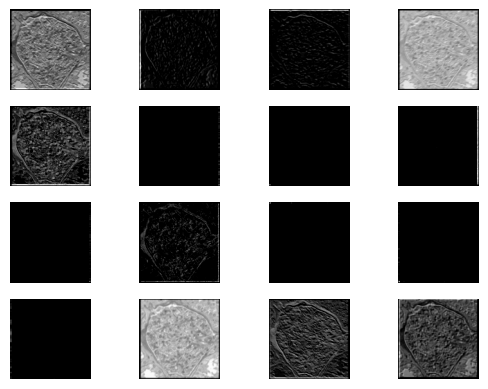

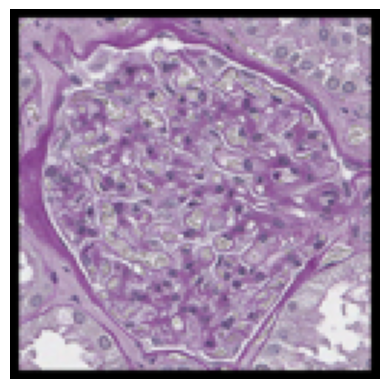

In [17]:
#Apply convolution on the first image

# apply the final filters on  class1_image[0]

from tensorflow.keras.models import Model

# Define a model that outputs the output of the first convolutional layer
model = Model(inputs=simple_cnn_model.inputs, outputs=simple_cnn_model.layers[0].output)

# Get the output of the first convolutional layer
feature_maps = model.predict(np.expand_dims(class1_images[5], 0))

# Plot the output of the first convolutional layer
n_features = feature_maps.shape[-1]
for i in range(n_features):
    plt.subplot(4, 4, i+1)
    plt.imshow(feature_maps[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.show()

# apply the final filters on  class0_image[0]

# Get the output of the first convolutional layer
feature_maps = model.predict(np.expand_dims(class0_images[5], 0))

# Plot the output of the first convolutional layer
n_features = feature_maps.shape[-1]
for i in range(n_features):
    plt.subplot(4, 4, i+1)
    plt.imshow(feature_maps[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.show()

# plot the actual image
plt.imshow(class0_images[5])
plt.axis('off')
plt.show()


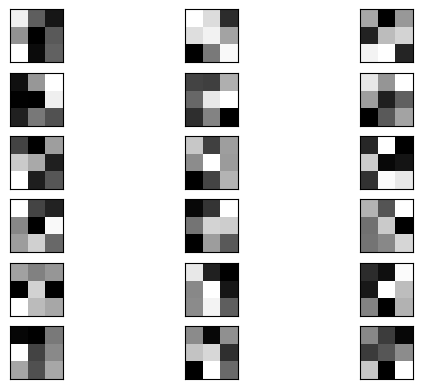

In [18]:
# filters of 2nd layer
filet, biases = simple_cnn_model.layers[3].get_weights()

# Normalize the filters
f_min, f_max = filet.min(), filet.max()
filters = (filet - f_min) / (f_max - f_min)

n_filters, ix = 6, 1

for i in range(n_filters):
    f = filters[:, :, :, i]
    for j in range(3):
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
plt.show()

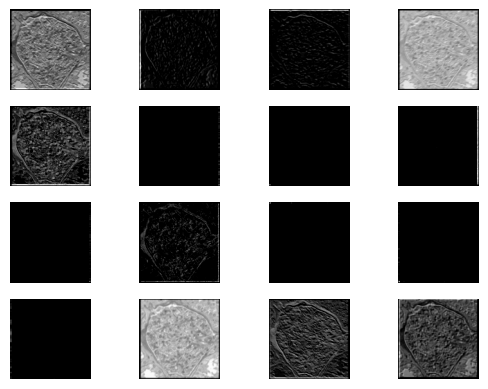

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


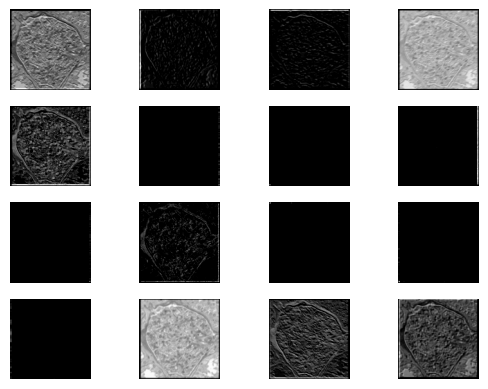

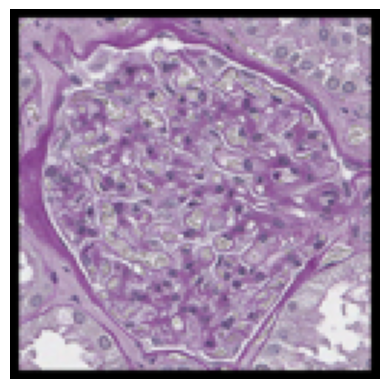

In [19]:
# Define a model that outputs the output of the seond convolutional layer
model = Model(inputs=simple_cnn_model.inputs, outputs=simple_cnn_model.layers[0].output)

# Get the output of the second convolutional layer from previous layer id features map


# Plot the output of the first convolutional layer
n_features = feature_maps.shape[-1]
for i in range(n_features):
    plt.subplot(4, 4, i+1)
    plt.imshow(feature_maps[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.show()

# apply the final filters on  class0_image[0]

# Get the output of the first convolutional layer
feature_maps = model.predict(np.expand_dims(class0_images[5], 0))

# Plot the output of the first convolutional layer
n_features = feature_maps.shape[-1]
for i in range(n_features):
    plt.subplot(4, 4, i+1)
    plt.imshow(feature_maps[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.show()

# plot the actual image
plt.imshow(class0_images[5])
plt.axis('off')
plt.show()


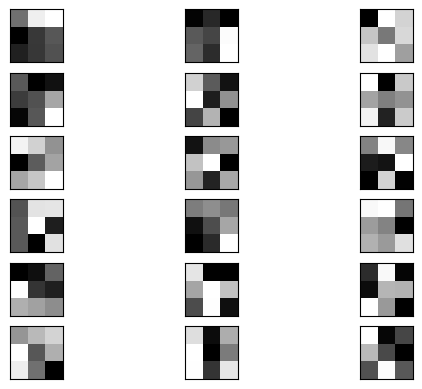

In [20]:
# filters of 2nd layer
filet, biases = simple_cnn_model.layers[5].get_weights()

# Normalize the filters
f_min, f_max = filet.min(), filet.max()
filters = (filet - f_min) / (f_max - f_min)

n_filters, ix = 6, 1

for i in range(n_filters):
    f = filters[:, :, :, i]
    for j in range(3):
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


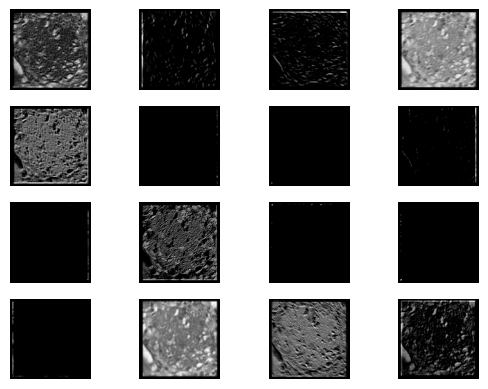

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


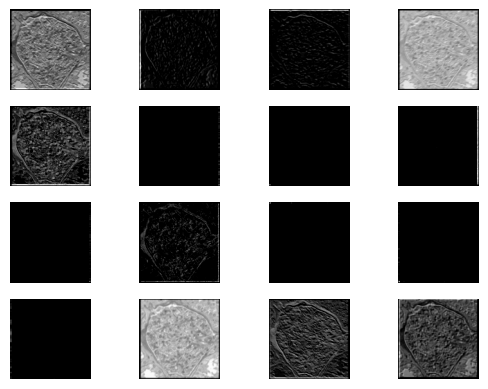

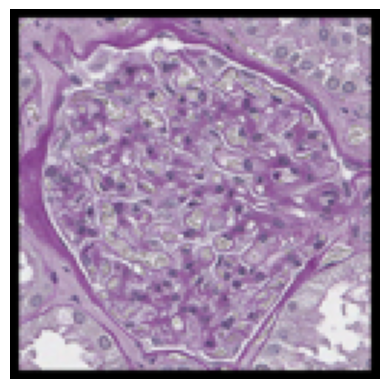

In [21]:
# Define a model that outputs the output of the first convolutional layer
model = Model(inputs=simple_cnn_model.inputs, outputs=simple_cnn_model.layers[0].output)

# Get the output of the first convolutional layer
feature_maps = model.predict(np.expand_dims(class1_images[5], 0))

# Plot the output of the first convolutional layer
n_features = feature_maps.shape[-1]
for i in range(n_features):
    plt.subplot(4, 4, i+1)
    plt.imshow(feature_maps[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.show()

# apply the final filters on  class0_image[0]

# Get the output of the first convolutional layer
feature_maps = model.predict(np.expand_dims(class0_images[5], 0))

# Plot the output of the first convolutional layer
n_features = feature_maps.shape[-1]
for i in range(n_features):
    plt.subplot(4, 4, i+1)
    plt.imshow(feature_maps[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.show()

# plot the actual image
plt.imshow(class0_images[5])
plt.axis('off')
plt.show()
